<center>
<h1> TP-Projet d'optimisation numérique </h1>
<h1> Algorithme du lagrangien augmenté </h1>
</center>

## Implémentation

1. Implémenter l'algorithme du lagrangien augmenté, en utilisant les différentes méthodes
qui ont été vues en première partie pour la résolution de la suite de problèmes sans
contraintes (fichier `src/lagrangien_augmente.jl`). La spécification est donnée dans le fichier.
2. Vérifier que les tests ci-dessous passent.
 

In [10]:
include("../src/lagrangien_augmente.jl")
include("../test/tester_lagrangien_augmente.jl")

#
afficher = true# si true, alors affiche les résultats des algorithmes

#
tester_lagrangien_augmente(lagrangien_augmente, afficher);

Affichage des résultats des algorithmes : true

80
-------------------------------------------------------------------------
Résultats de : LA et newton appliqué à f1:
  * x0       = [0, 1, 1]
  * x_sol    = [0.5000042424566808, 1.2499978787716595, 0.5000042424566811]
  * f(x_sol) = 2.249961818051857
  * nb_iters = 7
  * flag     = 0
  * solution = [0.5, 1.25, 0.5]
80
-------------------------------------------------------------------------
Résultats de : LA et newton appliqué à f1:
  * x0       = [0.5, 1.25, 1.0]
  * x_sol    = [0.5000042424566808, 1.2499978787716595, 0.5000042424566811]
  * f(x_sol) = 2.249961818051857
  * nb_iters = 7
  * flag     = 0
  * solution = [0.5, 1.25, 0.5]
40
-------------------------------------------------------------------------
Résultats de : LA et newton appliqué à f2:
  * x0       = [1, 0]
  * x_sol    = [0.9072336571162266, 0.8227549044924193]
  * f(x_sol) = 0.008615707033558758
  * nb_iters = 5
  * flag     = 0
  * solution = [0.9072339605110892, 0

## Interprétation

 1. Commenter les résultats obtenus, en étudiant notamment les valeurs en sortie de $\lambda_k$ et $\mu_k$.
 2. Étudier l'influence du paramètre $\tau$ dans la performance de l'algorithme. Pour cela vous réaliserez des tests numériques.

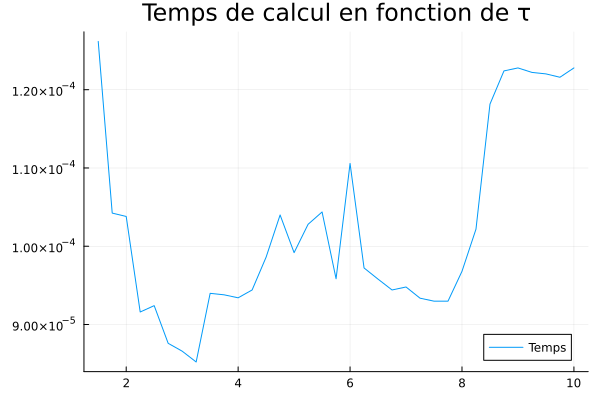

In [9]:
# Expérimentations numériques à faire ici.
# Vous pouvez utiliser le package Plots pour les affichages de courbes: using Plots
using Plots
include("../test/fonctions_de_tests.jl")
include("../src/lagrangien_augmente.jl")

function appel(τ, x0, tol, nb)
    s=0
    for i in 1:1:nb
        t = time()
        x_sol, f_sol, flag, nb_iters, _ = lagrangien_augmente(fct2, grad_fct2, hess_fct2, contrainte2, grad_contrainte2, hess_contrainte2, x0, tol_abs=tol, tol_rel=tol, algo_noc="rc-gct",τ = τ)
        s+=time()-t
    end
    return s/nb
    #return nb_iters
end


val_τ = range(1.25,10,step = 0.25)
t_τ = []

# Série de tests :
x0 = pts2.x03
tol = 1e-5
nb = 5

t_τ = map(τ -> appel(τ, x0, tol, nb), val_τ)
#println(t_τ)

plot(val_τ[2:1:end],t_τ[2:1:end],label = "Temps", plot_title="Temps de calcul en fonction de τ")


### Réponses
 1. Pour une fonction donnée, $\lambda_k$ (final) va être le même; tandis que pour $\mu_k$, il peut avoir beaucoup augmenté avec le nombre d'itérations pour ramener l'optimisation dans la zone de contrainte ($\mu_k$ sert à pénaliser $||c||$).
 En particulier pour le cas de test "LA et rc-cauchy appliqué à f1" avec x0 = [0.5, 1.25, 1.0], on a 24 itérations et $\mu_k = 2560$  
 J'ai aussi remarqué que l'algorithme des régions de confiance utilisé avec la méthode de cauchy met beaucoup plus d'itérations que les autres méthodes de résolution. Ce n'est pas le cas pour d'autres camarades..
 
 2. $\tau$ intervient dans la modification du facteur de pénalité $\mu_k$ dans le cas où on ne se trouve pas dans la zone de contrainte.  
 Je n'ai pas trouvé numériquement d'interêt à modifier $\tau$; les valeurs moyennes temporelles pour $\tau$ donné sont du même ordre de grandeur, peu importe la fonction ou la contrainte.  
 Intuitivement j'aurais dit que l'avoir trop bas ralentirait l'algorithme (ne pas assez pénaliser c), et trop haut aussi (trop pénaliser c rendrait la résolution sans contrainte plus difficile).